In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('data.csv')
headers = ['year', 'quarter', 'ndpi', 'oil_export', 'oil_prod', 'urals_price', 'usd', 'kts', 'brent','taxrate']
df.columns = headers

dates = df[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
df.index = pd.DatetimeIndex(quarterly)

print(df.shape)  # (56, 10)
df222 = df[['ndpi', 'oil_prod', 'kts']]
df = df[['ndpi', 'oil_export', 'oil_prod', 'kts', 'brent']]
df.tail()

(61, 10)


,ndpi,oil_export,oil_prod,kts,brent
2019-03-31,1478.3,47252.1,139000.0,15.0,68.4
2019-06-30,1700.2,46504.3,143928.0,13.9,66.6
2019-09-30,1470.4,47582.7,141464.0,13.7,60.8
2019-12-31,1457.5,46992.4,142696.0,14.3,66.0
2020-03-31,1464.0,47287.0,142080.0,6.1,22.7


KeyError: "['usd', 'taxrate', 'urals_price'] not in index"

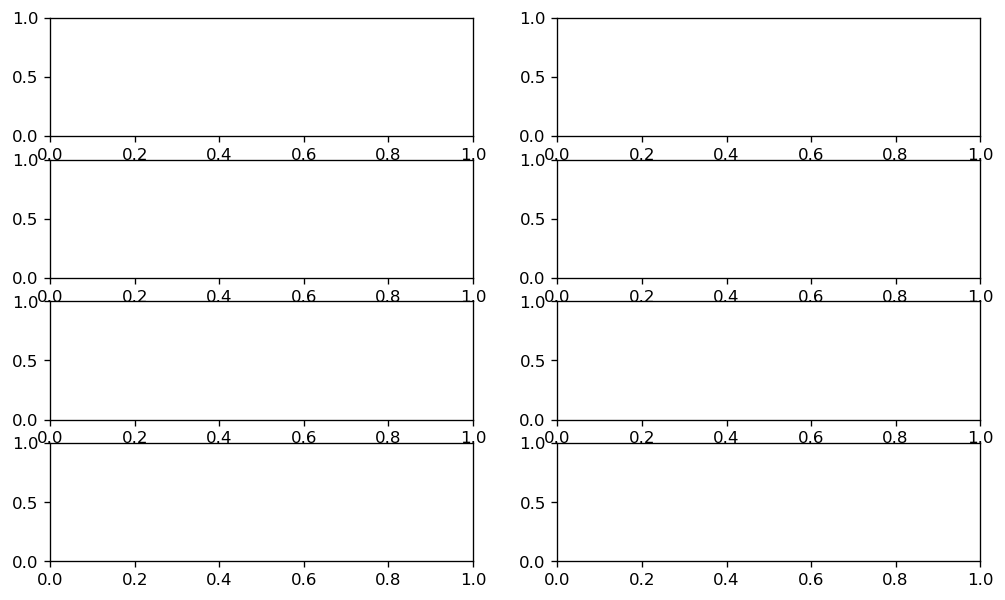

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    df = df[['ndpi', 'oil_export', 'oil_prod', 'urals_price', 'usd', 'kts', 'brent','taxrate']]
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)

    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [4]:
num_missing = (df222 == 0).sum()
print(num_missing)

ndpi        0
oil_prod    0
kts         0
dtype: int64


In [5]:
nobs = 6
df_train, df_test = df222[0:-nobs], df222[-nobs:]
df2_train, df2_test = df[0:-nobs], df[-nobs:]
print(df222.shape)
print(df_train.shape)
print(df_test.shape)

(61, 3)
(55, 3)
(6, 3)


In [4]:
def tsplot(y, title, lags=None, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax, acf_ax, pacf_ax

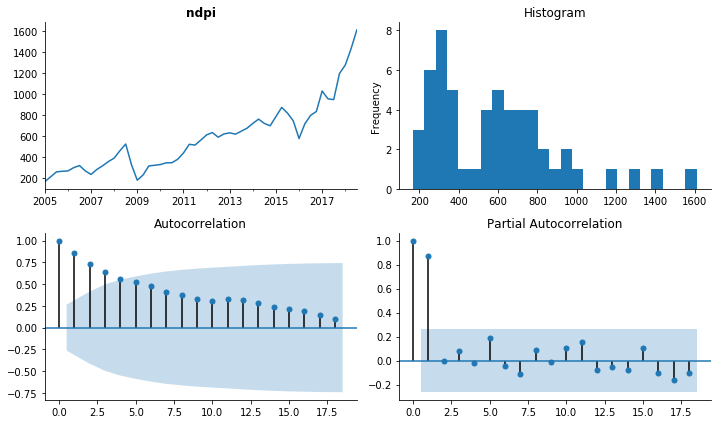

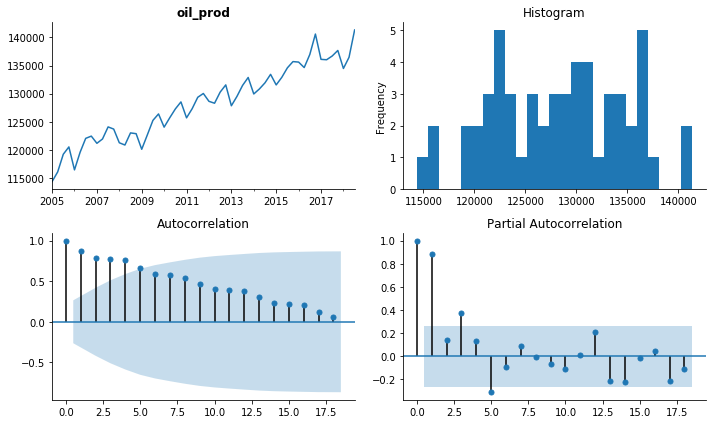

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1b271250>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1b555090>)

In [7]:
tsplot(df_train['ndpi'], 'ndpi', lags=None, figsize=(10, 6))
#tsplot(df_train['oil_export'], 'oil_export', lags=None, figsize=(10, 6))
tsplot(df_train['oil_prod'], 'oil_prod', lags=None, figsize=(10, 6))
#tsplot(df_train['urals_price'], 'urals_price', lags=None, figsize=(10, 6))
#tsplot(df_train['usd'], 'usd', lags=None, figsize=(10, 6))
#tsplot(df_train['kts'], 'kts', lags=None, figsize=(10, 6))
#tsplot(df_train['brent'], 'brent', lags=None, figsize=(10, 6))
#tsplot(df_train['taxrate'], 'taxrate', lags=None, figsize=(10, 6))

In [6]:
trans = df_train.diff().dropna()
trans = trans.diff().dropna()
#trans = np.log(df_train).diff().dropna()
#trans = trans[['ndpi', 'oil_export', 'oil_prod', 'urals_price', 'usd', 'kts', 'brent']]
#trans1 = trans[['ndpi', 'oil_prod', 'usd', 'kts']]
#trans2 = trans[['ndpi', 'oil_prod', 'kts']]
trans.head()

,ndpi,oil_prod,kts
2005-09-30,2.3,1412.5,0.2
2005-12-31,-41.6,-1834.4,-1.1
2006-03-31,-2.2,-5385.3,0.7
2006-06-30,27.2,7207.6,0.2
2006-09-30,-10.8,-649.0,-1.1


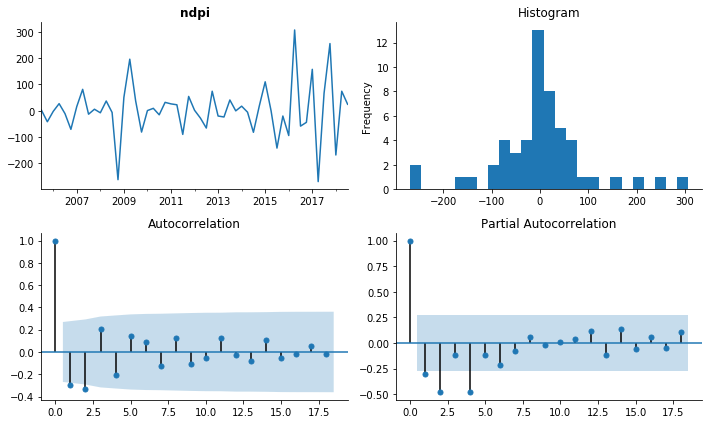

/Users/arnsamm/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


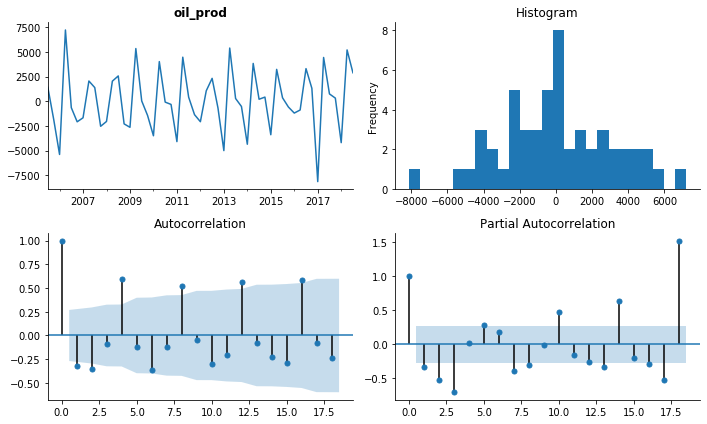

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1a5c9910>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a8dfd50>)

In [9]:
tsplot(trans['ndpi'], 'ndpi', lags=None, figsize=(10, 6))
#tsplot(trans['oil_export'], 'oil_export', lags=None, figsize=(10, 6))
tsplot(trans['oil_prod'], 'oil_prod', lags=None, figsize=(10, 6))
#tsplot(trans['urals_price'], 'urals_price', lags=None, figsize=(10, 6))
#tsplot(trans['usd'], 'usd', lags=None, figsize=(10, 6))
#tsplot(trans['kts'], 'kts', lags=None, figsize=(10, 6))
#tsplot(trans['brent'], 'brent', lags=None, figsize=(10, 6))
#tsplot(trans['taxrate'], 'taxrate', lags=None, figsize=(10, 6))

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [8]:
for name, column in trans.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ndpi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4611
 No. Lags Chosen       = 3
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "oil_prod" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2989
 No. Lags Chosen       = 11
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.0149. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "kts" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    

In [9]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors """


    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(trans, variables = trans.columns) 

,ndpi_x,oil_prod_x,kts_x
ndpi_y,1.0000,0.0000,0.0000
oil_prod_y,0.0114,1.0000,0.0263
kts_y,0.0052,0.0036,1.0000


In [10]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [11]:
cointegration_test(df222)

# КОГДА t < Crit Value ====>> H:0 =====>> NO COINT (False)
# КОГДА t > Crit Value ====>> H:A =====>> COINT (True)     OKKKKK

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
ndpi   ::  34.53     > 24.2761   =>   True
oil_prod ::  7.43      > 12.3212   =>   False
kts    ::  0.0       > 4.1296    =>   False


In [12]:
model = VAR(trans)
x = model.select_order(maxlags=10)
x.summary()

/Users/arnsamm/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,27.34,27.46,7.446e+11,27.38
1,26.07,26.56,2.095e+11,26.25
2,25.54,26.40,1.251e+11,25.86
3,24.53,25.76*,4.625e+10*,24.98*
4,24.64,26.23,5.305e+10,25.23
5,24.63,26.60,5.586e+10,25.36
6,24.83,27.17,7.412e+10,25.69
7,24.71,27.41,7.431e+10,25.71
8,24.51,27.59,7.300e+10,25.65
9,24.68,28.12,1.109e+11,25.94


In [13]:
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, May, 2020
Time:                     02:28:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    25.4129
Nobs:                     50.0000    HQIC:                   24.7025
Log likelihood:          -789.483    FPE:                3.51213e+10
AIC:                      24.2657    Det(Omega_mle):     2.03248e+10
--------------------------------------------------------------------
Results for equation ndpi
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               3.922256         8.803703            0.446           0.656
L1.ndpi            -0.522944         0.168643           -3.101           0.002
L1.oil_prod         0.001684         0.003902            0.431       

In [14]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df222.columns, out):
    print(col, ':', round(val, 2))

ndpi : 2.17
oil_prod : 2.02
kts : 2.18


In [15]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = trans.values[-lag_order:]
forecast_input

3


array([[-1.6780e+02, -4.1902e+03,  3.9000e+00],
       [ 7.4300e+01,  5.1899e+03,  1.6000e+00],
       [ 2.4800e+01,  2.8795e+03, -3.1000e+00]])

In [16]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df222.columns)
df_forecast

,ndpi,oil_prod,kts
2018-12-31,-61.204894,-4245.518762,0.611274
2019-03-31,31.547623,-2774.460759,1.568310
2019-06-30,38.891506,4371.878815,-0.044835
2019-09-30,-24.052930,2175.352246,-1.285353
2019-12-31,-21.598566,-4050.656893,-0.377277
2020-03-31,11.649531,-1803.247896,1.631847


In [22]:
pred_inverse = df_forecast.cumsum()
f = pred_inverse + df_test
print(f['ndpi'])

2018-12-31    1748.095106
2019-03-31    1448.642729
2019-06-30    1709.434235
2019-09-30    1455.581305
2019-12-31    1421.082738
2020-03-31    1439.232269
Name: ndpi, dtype: float64


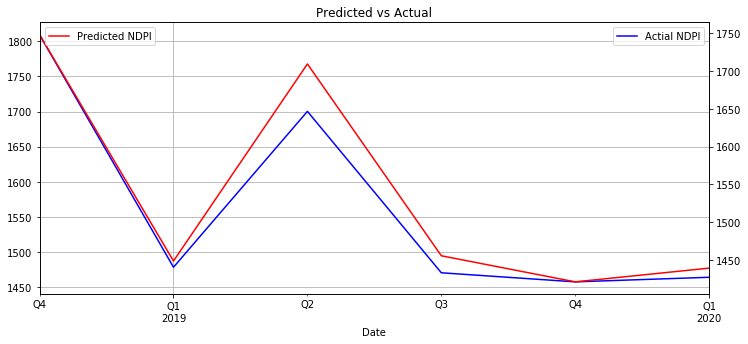

In [18]:
plt.figure(figsize = (12,5))
plt.xlabel('Date')

ax1 = df_test['ndpi'].plot(color='blue',grid = True, label = 'Actial NDPI')
ax2 = f['ndpi'].plot(color='red',grid = True, secondary_y = True, label = 'Predicted NDPI')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted vs Actual')
plt.show()

In [19]:
forecast_errors = [df_test['ndpi'][i] - f['ndpi'][i] for i in range(len(df_test['ndpi']))]
bias = sum(forecast_errors) * 1.0/len(df_test['ndpi'])
print('Bias: %f' % bias)

mae = mean_absolute_error(df_test['ndpi'],f['ndpi'])
print('MAE: %f' % mae)

mse = mean_squared_error(df_test['ndpi'],f['ndpi'])
print('MSE: %f' % mse)

rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Bias: 26.271936
MAE: 29.350015
MSE: 1145.019176
RMSE: 33.838132


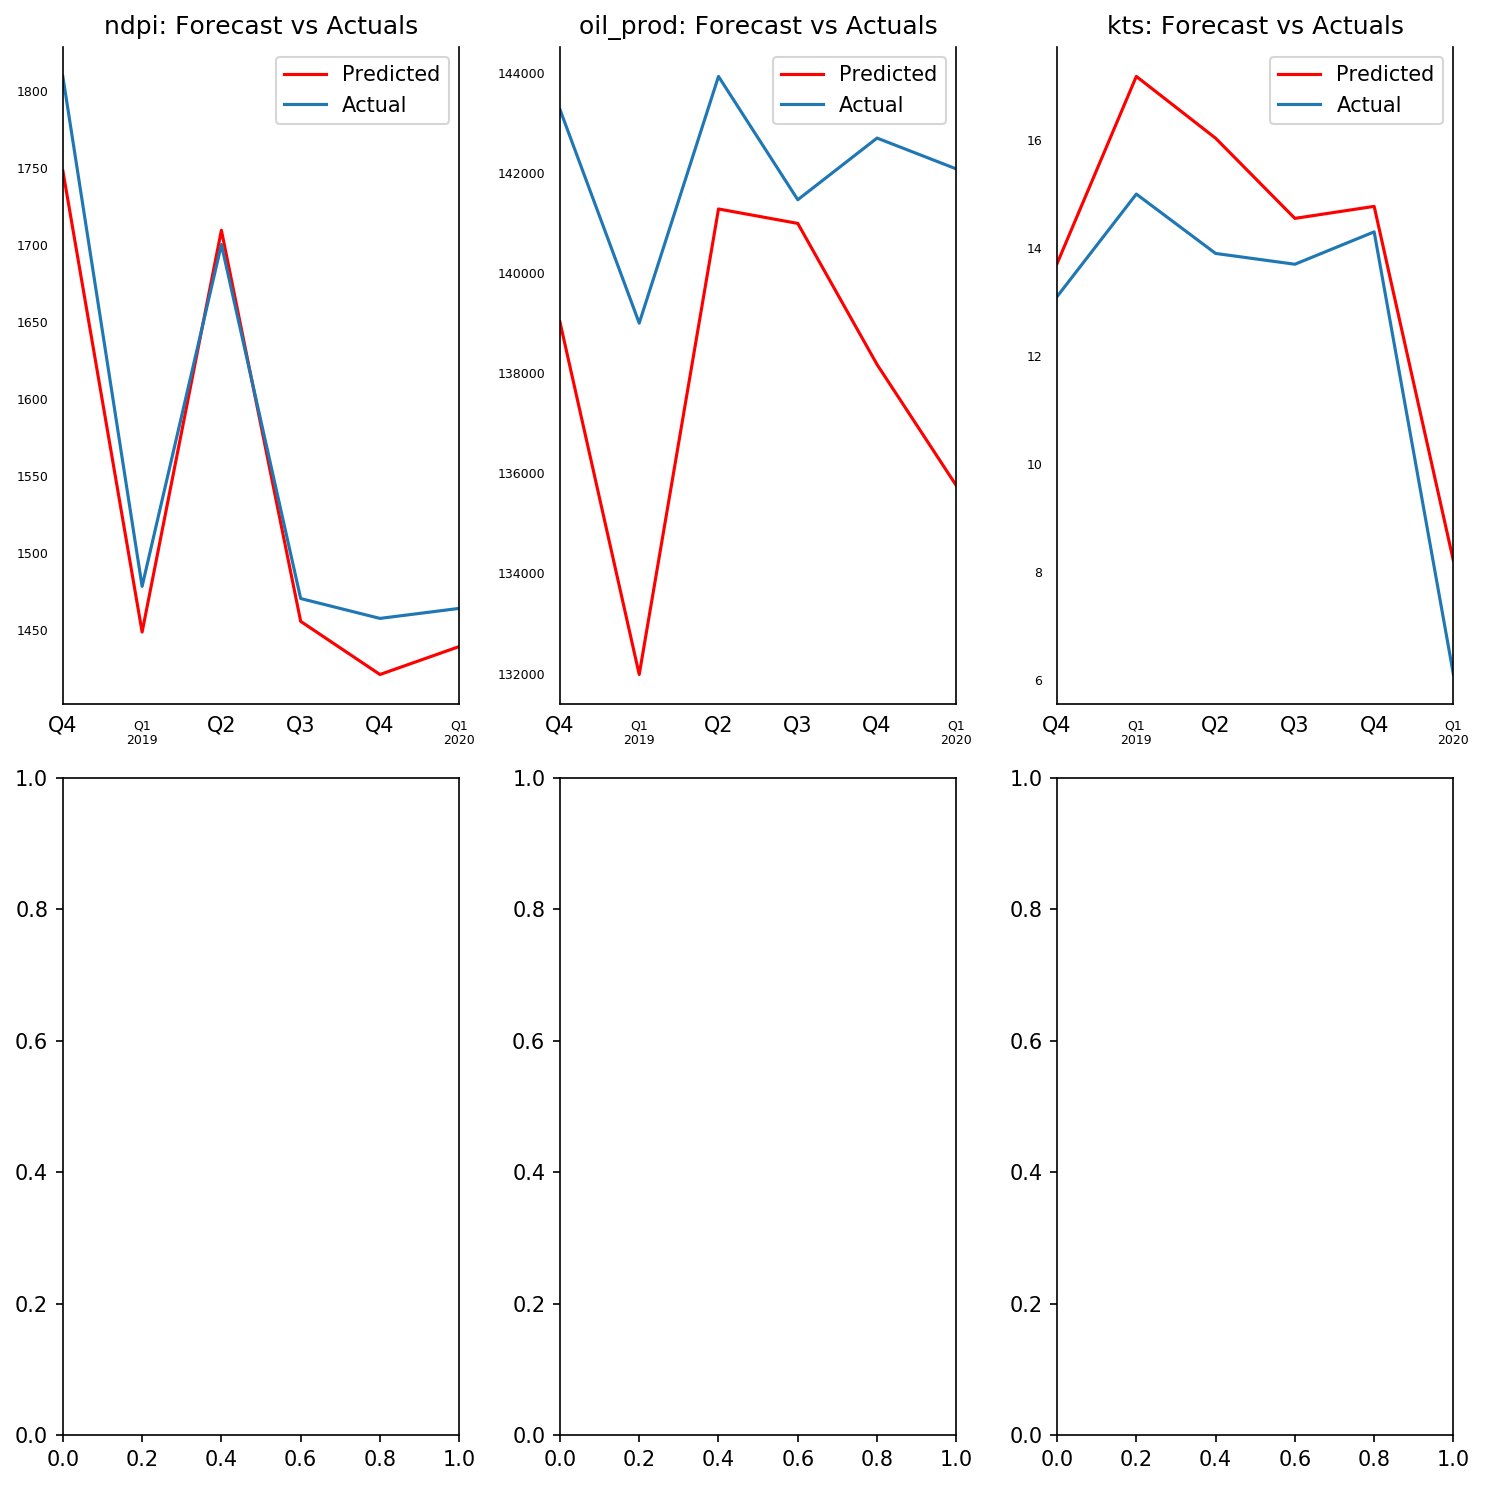

In [20]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df222.columns, axes.flatten())):
    f[col].plot(color='red',label = 'Predicted', legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(label = 'Actual', legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [21]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: ndpi')
accuracy_prod = forecast_accuracy(f['ndpi'].values, df_test['ndpi'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: oil_prod')
accuracy_prod = forecast_accuracy(f['oil_prod'].values, df_test['oil_prod'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: ndpi
mape :  0.0186
me :  -26.2719
mae :  29.35
mpe :  -0.0167
rmse :  33.8381
corr :  0.9882
minmax :  0.0185

Forecast Accuracy of: oil_prod
mape :  0.0297
me :  -4206.0677
mae :  4206.0677
mpe :  -0.0297
rmse :  4743.912
corr :  0.7878
minmax :  0.0297
